<a href="https://colab.research.google.com/github/brendankilduff/assignment4/blob/main/Kilduff_Brendan_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

In [1]:
! git clone https://www.github.com/DS3001/assignment4

fatal: destination path 'assignment4' already exists and is not an empty directory.


**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual











  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/assignment4/data/cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
df['Price'].describe()
df['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

<Axes: >

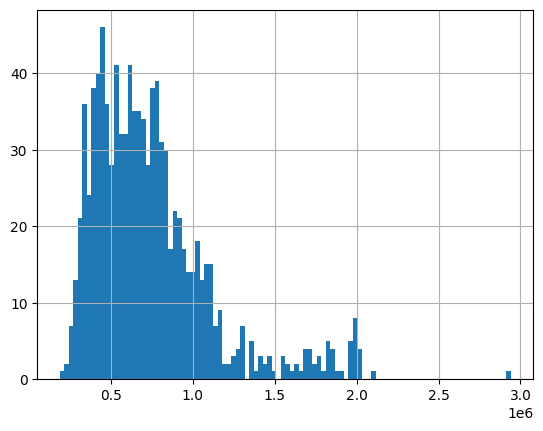

In [5]:
df["Price"].hist(bins = 100)

Data is skewed with outliers, log transformation is necessary.

<Axes: >

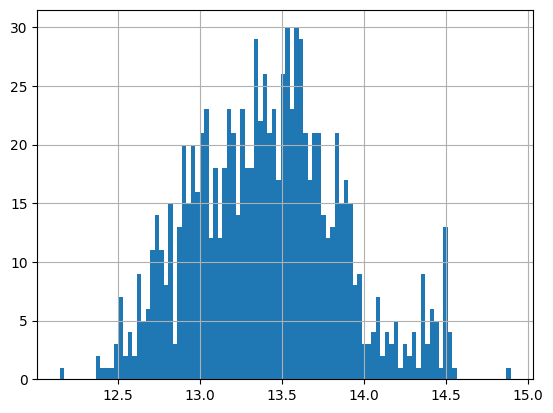

In [6]:
df["lPrice"]=np.log(df["Price"])
df["lPrice"].hist(bins = 100)

Dara is more symettrical but outliers could still be an issue.

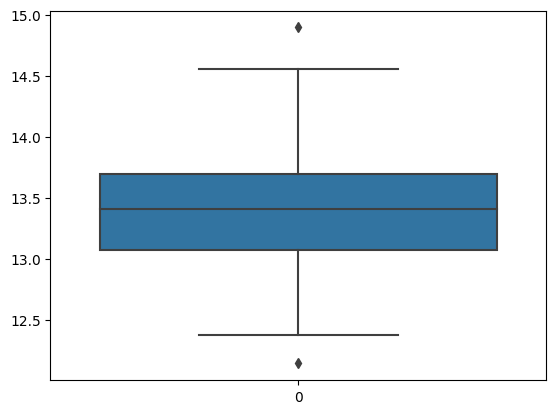

In [7]:
x=df['lPrice']
sns.boxplot(x)
plt.show()

<ipython-input-8-c6fcfeedd1d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x < lower_whisker ] = lower_whisker
<ipython-input-8-c6fcfeedd1d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[ x > upper_whisker ] = upper_whisker


<Axes: >

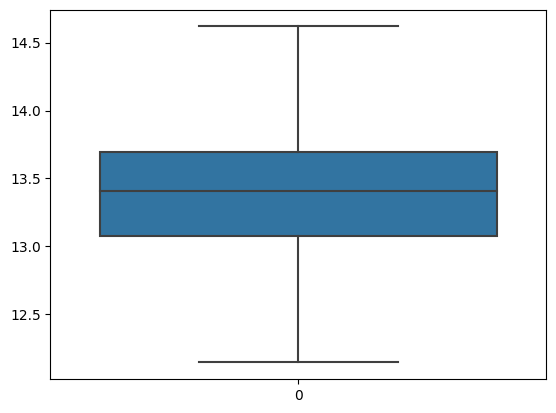

In [8]:
def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

sns.boxplot(windsorize(x))

<Axes: >

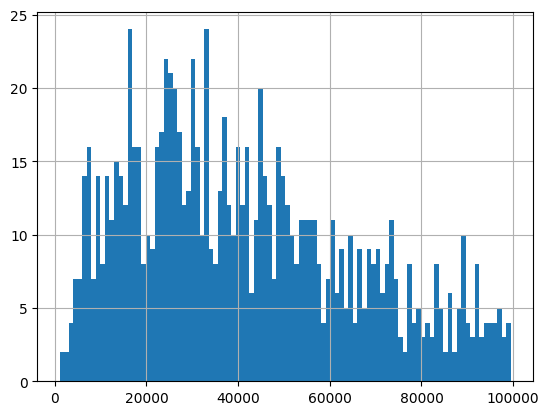

In [9]:
df["Mileage_Run"].hist(bins = 100)

Mileage doesn't look too skewed but need to check for outliers.

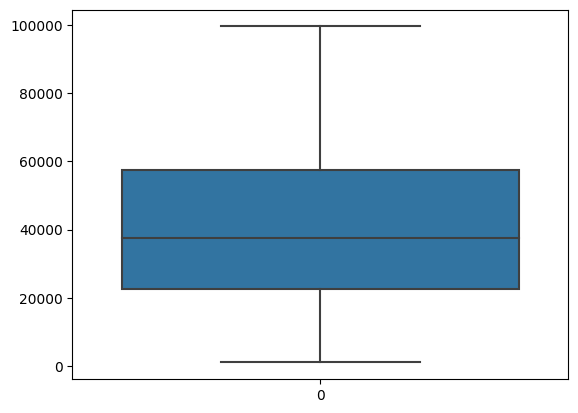

In [10]:
x=df['Mileage_Run']
sns.boxplot(x)
plt.show()

In [11]:
df['age'] = max(df['Make_Year'])-df['Make_Year']

In [12]:
df['age'].value_counts()

5     137
2     135
3     124
4     112
6      92
7      85
8      73
1      69
9      53
11     44
10     38
0      14
Name: age, dtype: int64

In [13]:
df["No_of_Owners"].value_counts()

1st    818
2nd    154
3rd      4
Name: No_of_Owners, dtype: int64

In [14]:
## new variable used = 1 if car is used and 0 if car is new
df["used"]=df["No_of_Owners"]
df["used"]=df["used"].replace("1st",0)
df["used"]=df["used"].replace("2nd",1)
df["used"]=df["used"].replace("3rd",1)
df["used"].value_counts()

0    818
1    158
Name: used, dtype: int64

In [15]:
df["Fuel_Type"].value_counts()

petrol        783
diesel        191
petrol+cng      2
Name: Fuel_Type, dtype: int64

In [16]:
## new variables diesel = 1 if fuel type is diesel and 0 if not
df["diesel"]=df["Fuel_Type"].replace("diesel",1)
df["diesel"]=df["diesel"].replace("petrol",0)
df["diesel"]=df["diesel"].replace("petrol+cng",0)
df["diesel"].value_counts()


0    785
1    191
Name: diesel, dtype: int64

In [17]:
df["Transmission_Type"].value_counts()

Manual       712
Automatic    264
Name: Transmission_Type, dtype: int64

In [18]:
## new variable automatic that = 1 if the transmission type is automatic and 0 if it is manual
df["automatic"]=df["Transmission_Type"].replace("Automatic",1)
df["automatic"]=df["automatic"].replace("Manual",0)
df["automatic"].value_counts()

0    712
1    264
Name: automatic, dtype: int64

In [19]:
df["Transmission"].value_counts()

5-Speed    749
6-Speed    169
4-Speed     39
7-Speed     16
CVT          3
Name: Transmission, dtype: int64

In [20]:
## Create new variable for each type of transmission and keeps them binary, don't need to include all dummy variables in regression however, that would create multi-colinearity
df['5speed']=0
df['7speed']=0
df['6speed']=0
df['4speed']=0
df['cvt']=0
df.loc[ df["Transmission"]=="5-Speed","5speed"]=1
df.loc[ df["Transmission"]=="6-Speed","6speed"]=1
df.loc[ df["Transmission"]=="4-Speed","4speed"]=1
df.loc[ df["Transmission"]=="7-Speed","7speed"]=1
df.loc[ df["Transmission"]=="CVT","cvt"]=1

In [21]:
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,...,lPrice,age,used,diesel,automatic,5speed,7speed,6speed,4speed,cvt
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,...,13.395439,5,0,1,1,0,1,0,0,0
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,...,13.432785,6,0,0,0,1,0,0,0,0
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,...,13.583579,3,1,0,0,1,0,0,0,0
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,...,12.933621,5,0,0,0,1,0,0,0,0
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,...,13.151922,5,0,0,0,1,0,0,0,0


  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [22]:
price_by_brand = df.groupby('Make')['lPrice'].describe()
print(price_by_brand)

               count       mean       std        min        25%        50%  \
Make                                                                         
Chevrolet        6.0  12.919895  0.480975  12.495004  12.568392  12.752286   
Datsun           3.0  12.576047  0.036311  12.538967  12.558302  12.577636   
Ford            52.0  13.468280  0.210895  12.577636  13.361380  13.469493   
Honda           73.0  13.536318  0.336972  12.663497  13.272506  13.573439   
Hyundai        305.0  13.368511  0.398781  12.421184  13.091904  13.366094   
Jeep             4.0  14.216591  0.105084  14.070153  14.183270  14.240265   
Kia              8.0  14.292177  0.076877  14.129591  14.272242  14.303105   
MG Motors       35.0  14.439052  0.066263  14.278615  14.395744  14.429615   
Mahindra        18.0  13.898953  0.159906  13.587354  13.851808  13.905680   
Maruti Suzuki  293.0  13.218132  0.371409  12.375815  12.926348  13.174956   
Nissan           4.0  13.641194  0.392610  13.071070  13.537775 

<Axes: xlabel='lPrice', ylabel='Density'>

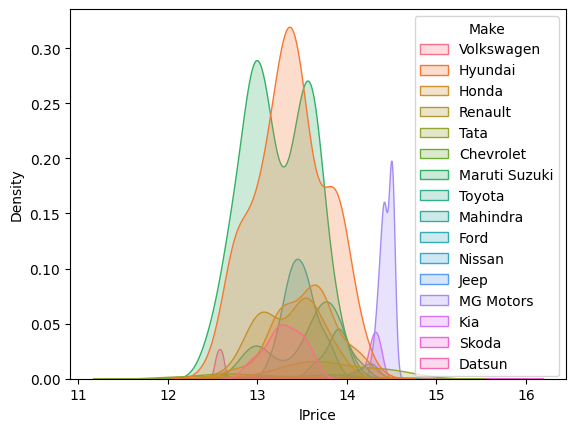

In [23]:
sns.kdeplot(data=df,x="lPrice",hue="Make",fill=True)

In general, MG Motors has the highest average value. After MG Motors, Kia and Jeep were the second two most expensive car brands on average. This can be seen looking at the Kernal density plot. Jeep is hard to see however due to many plots in front of it, but these brands are clearly the furtherst to the right. In general, there are some unique insights into the pricing of companies such as Suzuki and Hyundai, that seem to dominate the entire middle market (the orange and green density plots.) There's also a trend where brands distribute their prices in a bell-shaped curved, where the mojority of their cars stay in the middle of their price ranges.

  3. Split the data into an 80% training set and a 20% testing set.

In [24]:
X = df.drop(["Price","lPrice"], axis=1)
y = df['lPrice']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [26]:
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.metrics import mean_squared_error
vars = ['Mileage_Run','Seating_Capacity','age'] # This is a list of variables to use

X1 = X_train.loc[:,vars] # Construct data matrix
def linear(X,y,print):
    if print:
        print("Intercept: " + str(reg.intercept_)) # Intercept value
        print("Coefficients: " + str(reg.coef_)) # Regression coefficients
        print("R squared: " + str(reg.score(X, y)))# R squared measure
        print("SSE: " + str(np.sum( (y-reg.predict(X))**2) ))
        print("RMSE: " + str(mean_squared_error(y,reg.predict(X),squared=False)))#RMSE
    return(reg.score(X, y))
X1_test=X_test.loc[:,vars]
reg = LinearRegression().fit(X1, y_train)
linear(X1_test,y_test,print)

Intercept: 13.320646966734952
Coefficients: [ 4.54345050e-06  9.57584189e-02 -1.17509247e-01]
R squared: 0.4227715818659862
SSE: 22.32234929870031
RMSE: 0.33747523944471375


0.4227715818659862

In [27]:
vars2 = ['used','diesel','automatic','7speed','5speed','4speed','6speed']
X1 = X_train.loc[:,vars2] # Construct data matrix

def linear(X,y,print):
    if print:
        print("Intercept: " + str(reg.intercept_)) # Intercept value
        print("Coefficients: " + str(reg.coef_)) # Regression coefficients
        print("R squared: " + str(reg.score(X, y)))# R squared measure
        print("SSE: " + str(np.sum( (y-reg.predict(X))**2) ))
        print("RMSE: " + str(mean_squared_error(y,reg.predict(X),squared=False)))#RMSE
    return(reg.score(X, y))
X1_test=X_test.loc[:,vars2]
reg = LinearRegression().fit(X1, y_train)
linear(X1_test,y_test,print)

Intercept: 13.631802553267047
Coefficients: [-0.14713247  0.23507609  0.11167054  0.3533792  -0.37906358 -0.4428227
  0.12867711]
R squared: 0.36691707400856366
SSE: 24.48233275608255
RMSE: 0.35342589180819955


0.36691707400856366

In [28]:
vars3 = vars=['used','diesel','automatic','7speed','5speed','4speed','6speed','Mileage_Run','Seating_Capacity','age']
X1 = X_train.loc[:,vars3] # Construct data matrix

def linear(X,y,print):
    if print:
        print("Intercept: " + str(reg.intercept_)) # Intercept value
        print("Coefficients: " + str(reg.coef_)) # Regression coefficients
        print("R squared: " + str(reg.score(X, y)))# R squared measure
        print("SSE: " + str(np.sum( (y-reg.predict(X))**2) ))
        print("RMSE: " + str(mean_squared_error(y,reg.predict(X),squared=False)))#RMSE
    return(reg.score(X, y))
X1_test=X_test.loc[:,vars3]
reg = LinearRegression().fit(X1, y_train)
linear(X1_test,y_test,print)

Intercept: 13.49433981572268
Coefficients: [-1.93507979e-02  2.58841141e-01  7.61991707e-02  3.85140425e-01
 -1.80256691e-01 -1.55569016e-01  2.20465799e-01  7.74891935e-07
  6.63084370e-02 -8.53124201e-02]
R squared: 0.619270779228896
SSE: 14.723409983431257
RMSE: 0.27407925622158236


0.619270779228896

Looking at the 3 models, we aren't able to make concrete obervations as to which model best explains variations in the repsonse variable due to the differences in number of explanatory variables. An unadjusted R2 will inherently favor a model with more variables, so this is something we need to consider in our findings. However, from the models, the combined numeric and categorical had the highest R2. Then, the numeric has a larger R2 than the categorical even with fewer independent variables. From the R2 alone, we can conclude that model 3's variables explain the variation in lPrice the best. Looking at RMSE, the RMSE for each model ranks the same as the R2. Model 3 has the lowest RMSE which means the difference between the predicted values and actual observed values is smallest on average compared to the other models.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

catvars = ['used', 'diesel', 'automatic', '7speed', '5speed', '4speed', '6speed']
numerical_vars = ['Mileage_Run', 'Seating_Capacity', 'age']

# Extracting categorical data
cat_data = X_train[catvars]

def test_polynomial_features(X_train, y_train, degree):
    # Extracting and transforming numerical data
    num_data = X_train[numerical_vars]
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    num_data_expanded = poly.fit_transform(num_data)

    # Combining with categorical data
    X_combined = np.concatenate((num_data_expanded, cat_data.values), axis=1)

    # Splitting the data
    X_train_combined, X_test_combined, y_train_split, y_test_split = train_test_split(X_combined, y_train, test_size=0.2)

    # Training the model
    model = LinearRegression()
    model.fit(X_train_combined, y_train_split)

    # Making predictions and evaluating the model
    y_pred = model.predict(X_test_combined)
    r2 = r2_score(y_test_split, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))

    return r2, rmse

# Example usage - testing different degrees
for degree in range(1, 15):  # Adjust the range as needed
    r2, rmse = test_polynomial_features(X_train, y_train, degree)
    print(f"Degree: {degree}, R2: {r2}, RMSE: {rmse}")




Degree: 1, R2: 0.6787063025514706, RMSE: 0.2614562942049448
Degree: 2, R2: 0.682660639553826, RMSE: 0.25730915525944853
Degree: 3, R2: 0.6431728941035004, RMSE: 0.28053680186566604
Degree: 4, R2: 0.381021677911082, RMSE: 0.3158977595373405
Degree: 5, R2: 0.2515857554600054, RMSE: 0.3982359246238503
Degree: 6, R2: 0.35530225748046096, RMSE: 0.36247917370599997
Degree: 7, R2: 0.28447064973723624, RMSE: 0.36289439332367934
Degree: 8, R2: 0.2843083412680285, RMSE: 0.3704745541763625
Degree: 9, R2: -28.004210116201595, RMSE: 2.487390351001715
Degree: 10, R2: 0.096942988960392, RMSE: 0.410682058644469
Degree: 11, R2: -0.17908427131854276, RMSE: 0.4830707543503946
Degree: 12, R2: 0.1599291792127534, RMSE: 0.42838697902920286
Degree: 13, R2: 0.11494801350744188, RMSE: 0.4551849714664219
Degree: 14, R2: -1.560659549188438, RMSE: 0.74299795211638


R2 intially increases at degree 2 along with a decrease in RMSE. After degree 2, R2 decreases everytime and RMSE increases everytime. R2 finally becomes negative at degree 9. Compared to model 3, the R2 increased by roughly 6 points and the RMSE decreased by roughly 2. Everytime I rerun the code, I get different R2 and RMSE numbers, which is questioning the validity of the model I created. However, I can't seem to debug the code anymore than I already have. In general however, degree 2 or degree 3 always seem to have the best R2 and RMSE numbers, so I will proceed with degree 2 for the next question.

In [30]:
catvars = ['used', 'diesel', 'automatic', '7speed', '5speed', '4speed', '6speed']
numerical_vars = ['Mileage_Run', 'Seating_Capacity', 'age']

# Extracting categorical data
cat_data = X_train[catvars]

 # Extracting and transforming numerical data
num_data = X_train[numerical_vars]
poly = PolynomialFeatures(degree=2, include_bias=False)
num_data_expanded = poly.fit_transform(num_data)

    # Combining with categorical data
X_combined = np.concatenate((num_data_expanded, cat_data.values), axis=1)

    # Splitting the data
X_train_combined, X_test_combined, y_train_split, y_test_split = train_test_split(X_combined, y_train, test_size=0.2)

    # Training the model
model = LinearRegression()
model.fit(X_train_combined, y_train_split)

    # Making predictions and evaluating the model
y_pred = model.predict(X_test_combined)
r2 = r2_score(y_test_split, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))

print(f"R2: {r2}, RMSE: {rmse}")

R2: 0.6172554464584422, RMSE: 0.2802827155052045


  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

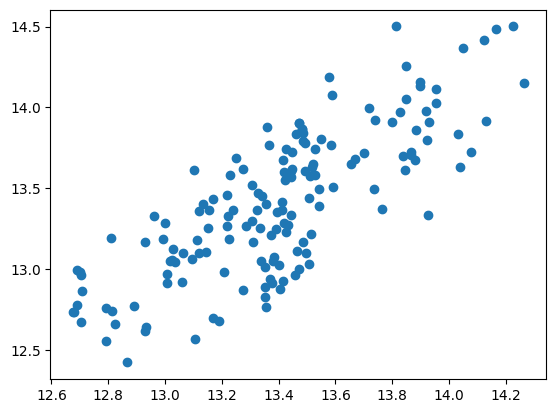

In [31]:
plt.scatter(x=y_pred,y=y_test_split)

In [32]:
residuals = y_test_split-y_pred

<Axes: xlabel='lPrice', ylabel='Density'>

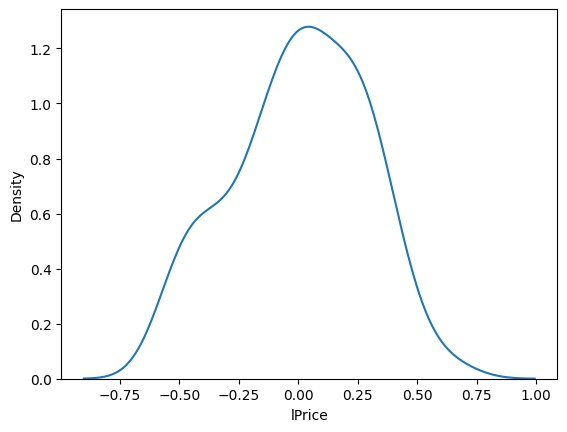

In [33]:
sns.kdeplot(data=residuals)

Looking at the scatterplot, the predicted values and true values of the test data form a linear relationship with an upward sloping diagonal. This indicates that the model is relatively accurate. In addition, when looking at the density plot for residuals, the plot is roughly bell-shaped centered around 0. Due to this, it is clear that the residuals are normally distributed and the expected error of the plot is roughly 0. However, the peak of the distribution is skewd to the right slightly, indicating a possible inherent bias with the model. However, in general, this model provides the basic requirements for being a good, accurate predictor of lPrice.

  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
vars=['used','diesel','automatic','7speed','5speed','4speed','6speed','Mileage_Run','Seating_Capacity','age']
D_X = X_train.loc[:,vars] # Construct data matrix
X_test = X_test.loc[:,vars]

def regtree(depth):
    cart = tree.DecisionTreeRegressor(max_depth=depth) # Create a classifier object
    cart = cart.fit(D_X, y_train) # Fit the classifier
    y_hat2 = cart.predict(X_test)
    N_test = len(y_test)
    print(f"Depth: {depth} R squared: {cart.score(X_test, y_test)}")
    print("RMSE: " + str(mean_squared_error(y_test,y_hat2,squared=False)))#RMSE

for depth in range(1, 10):
  regtree(depth)



Depth: 1 R squared: 0.24687296974828177
RMSE: 0.38548029226160363
Depth: 2 R squared: 0.39572895945601627
RMSE: 0.3452899617539304
Depth: 3 R squared: 0.5281929898983619
RMSE: 0.305105654698904
Depth: 4 R squared: 0.6604716605421186
RMSE: 0.258824913058788
Depth: 5 R squared: 0.6783036137043683
RMSE: 0.25193653572982766
Depth: 6 R squared: 0.6632663292263894
RMSE: 0.2577575139785615
Depth: 7 R squared: 0.6647627538888036
RMSE: 0.2571841466373283
Depth: 8 R squared: 0.6411062590612723
RMSE: 0.266103755806769
Depth: 9 R squared: 0.6317381705377223
RMSE: 0.2695543937490915


Depth 5 gives the best results as the R2 is the largest and RMSE is the smallest.

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

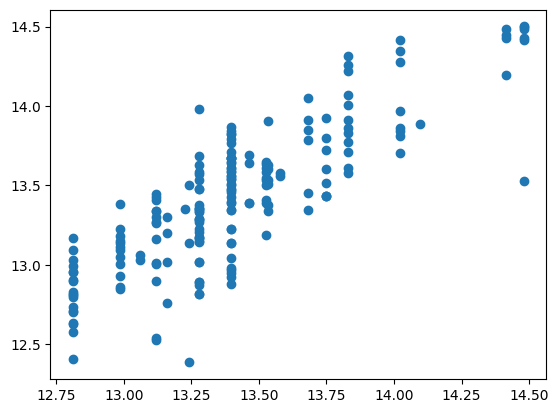

In [35]:
 # Fit the linear model
cart = tree.DecisionTreeRegressor(max_depth=5) # Create a classifier object
cart = cart.fit(D_X, y_train) # Fit the classifier
#Make Predictions on the Test Set
y_hat2 = cart.predict(X_test)
plt.scatter(x=y_hat2,y=y_test)

In [36]:
residuals = y_test-y_hat2

<Axes: xlabel='lPrice', ylabel='Density'>

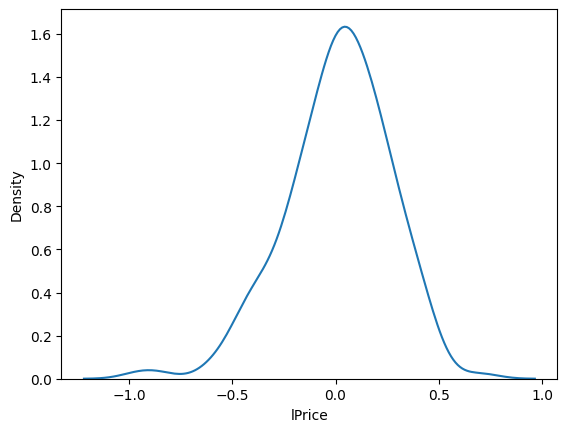

In [37]:
sns.kdeplot(data=residuals)

Yes, the residuals are roughly diagonal and the density curve is bell-shaped cand centered around 0.

9. Which model --- linear model or classification and regression tree --- has better performance on the test set?

The regression tree at a max depth of 5 had the highest R2 and the lowest RMSE of any model. With this being said, it is clear there is a linearity in the data. In general, linear regression would be more recommended when there aren't as many complex variables or interactions. However, by performance alone, I would go with the regression tree.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term






 1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?

In [38]:
df = pd.read_csv('/content/assignment4/data/contraception_hw.csv')

In [39]:
df['method'].value_counts()

1    629
3    511
2    333
Name: method, dtype: int64

In [40]:
pd.crosstab(df['method'],df['numberChildren'])

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


<Axes: title={'center': 'numberChildren'}, xlabel='[method]'>

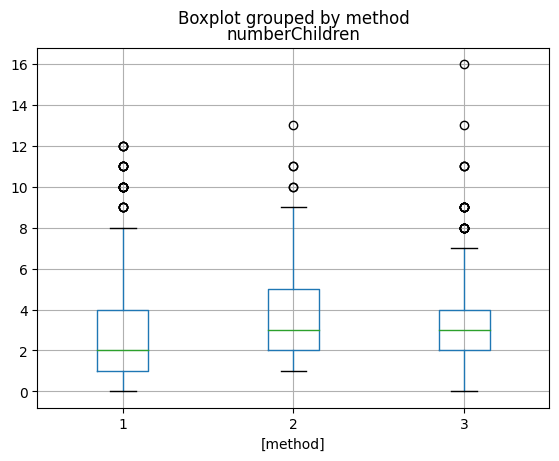

In [41]:
df.boxplot(column=["numberChildren"],by=['method'])

From the crosstab along with the boxplot, it appears that women that decide to use contraception (method 2 or 3), have more children than women that don't use any contraception. The 1st quartile for method 2 and 3 is equal to the mean for women that don't use any contraception

  2. Split the sample into ~80% training data and ~20% testing data.

In [42]:
y = df['method']
X = df.drop(["method",df.columns[0]], axis=1)
from sklearn.model_selection import train_test_split
q3X_train, q3X_test, q3y_train, q3y_test = train_test_split(X,y,test_size=.2,random_state=100)
q3X_train.head()

,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure
1227,26,2,4,2,1,1,1,4,0
784,36,4,4,4,1,1,1,4,0
503,28,3,3,3,1,1,1,2,0
614,38,4,4,4,0,1,3,4,0
1059,25,4,4,1,1,1,3,4,0


  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.

(array([37., 32.,  1., 34., 14., 83., 93.,  0.,  0.,  1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

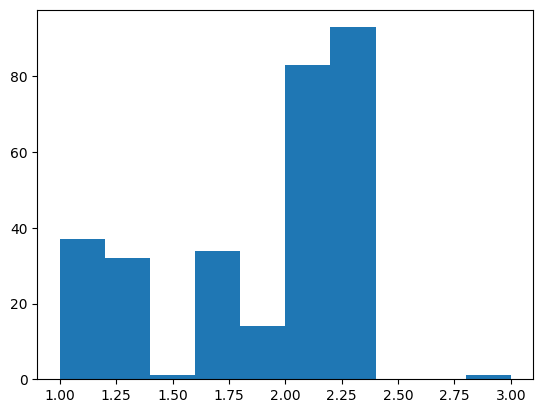

In [43]:
from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeRegressor(max_depth=5) # Create a classifier object
cart = cart.fit(q3X_train, q3y_train) # Fit the classifier
#Make Predictions on the Test Set
y_hat2 = cart.predict(q3X_test)
plt.hist(y_hat2)


The nodes are not treating the methods as catecorgical but rather quantitative. Because of this, we can't accurately use this model to predict methods. Rather, we are looking at a continuous value of method rather than 3 separate classifications.

  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?

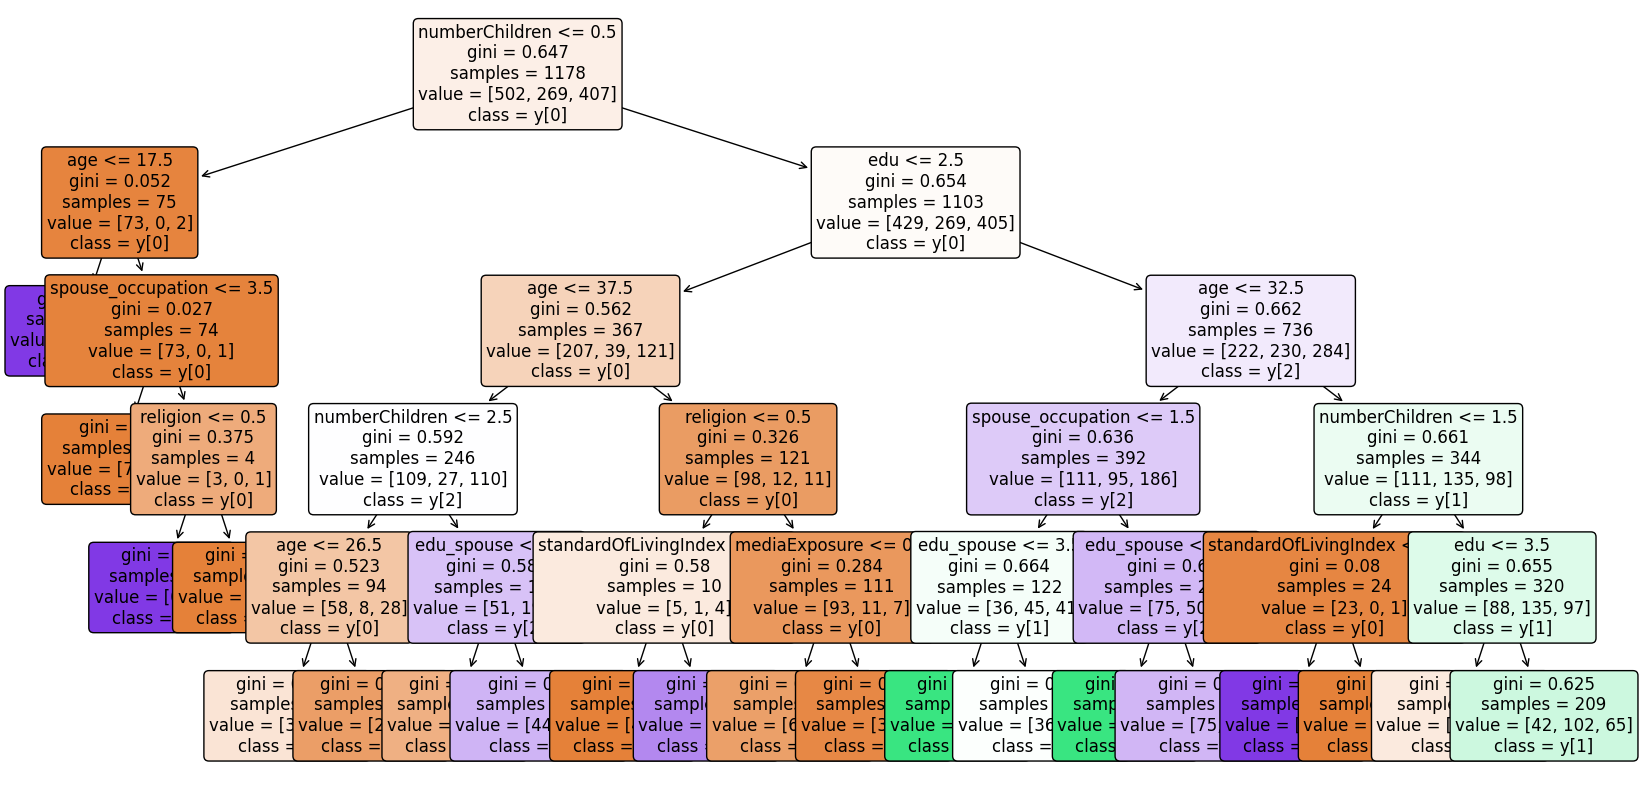

In [44]:
cart = tree.DecisionTreeClassifier(max_depth=5) # Create a classifier object
cart = cart.fit(q3X_train, q3y_train) # Fit the classifier
#Make Predictions on the Test Set
y_hat2 = cart.predict(q3X_test)
plt.figure(figsize=(20,10))  # Adjust the size as needed
tree.plot_tree(cart,
               filled=True,
               feature_names=q3X_train.columns,
               class_names=True,
               rounded=True,
               fontsize=12)
plt.show()

Looking at the classification tree, the main variables that are used are primarily numberChildren, age, education. However, the alogirithem uses other variables such as religion, spouse_occupation, edu_spuse, etc. Class = y[0] represents Method 1 with no contraceptive. The intial classification is based on number of children. Having less than 0.5 number of children, which means not having a child at all, indicates the person does not use contraceptive. Additionally, under the age of 17.5 indicates a person also doesn't use a contraceptive. This makes sense because younger people tend to be less experienced and more careless with their actions. Also, younger people such as teenagers most likely don't have any children to begin with. People that use long-term sterilization correlate with class 1. These are people with over 2.5 years of education, older than 32.5 years of age, and have more than 1.5 children. This also makes sense as people that are older with families already would tend to want to prevent having additional children. And at this age, you are likely married and smarter about contraception in general. There a few categories that correspond to class 2 which is short-term sterilization. One of these categories is people with at least one child, less than 2.5 years of education, and younger than 37.5. In general, older people use more contraceptives, along with higher education, and more children.


  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.

In [45]:
tab =pd.crosstab(q3y_test,y_hat2)
print("Total count: " +str(q3y_test.count()))
acc = ((tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[2,2])/295) # Compute Accuracy
print('Accuracy: ', acc, '\n')

acc1 = (tab.iloc[0,0]/(tab.iloc[0,0]+tab.iloc[1,0]+tab.iloc[2,0])) # Compute Accuracy
acc2 = (tab.iloc[1,1]/(tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[2,1]))
acc3 = (tab.iloc[2,2]/(tab.iloc[2,2]+tab.iloc[0,2]+tab.iloc[1,2]))
print('Accuracy1: ', acc1, '\n','Accuracy2: ', acc2, '\n','Accuracy3: ', acc3, '\n')
pd.crosstab(q3y_test,y_hat2)

Total count: 295
Accuracy:  0.5423728813559322 

Accuracy1:  0.646551724137931 
 Accuracy2:  0.41935483870967744 
 Accuracy3:  0.5348837209302325 



col_0,1,2,3
method,,,
1,75,24,28
2,13,39,12
3,28,30,46


  6. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

You can't use linear probability to do this exercise because there are 3 categorical variables. Because of this, it would be impossible to predict a specific outcome without using a classification tree. If there were only two outcomes, then a binary variable could be used for a linear regression, where the outsome would represent a percentage, either leaning towards 1 or 0.